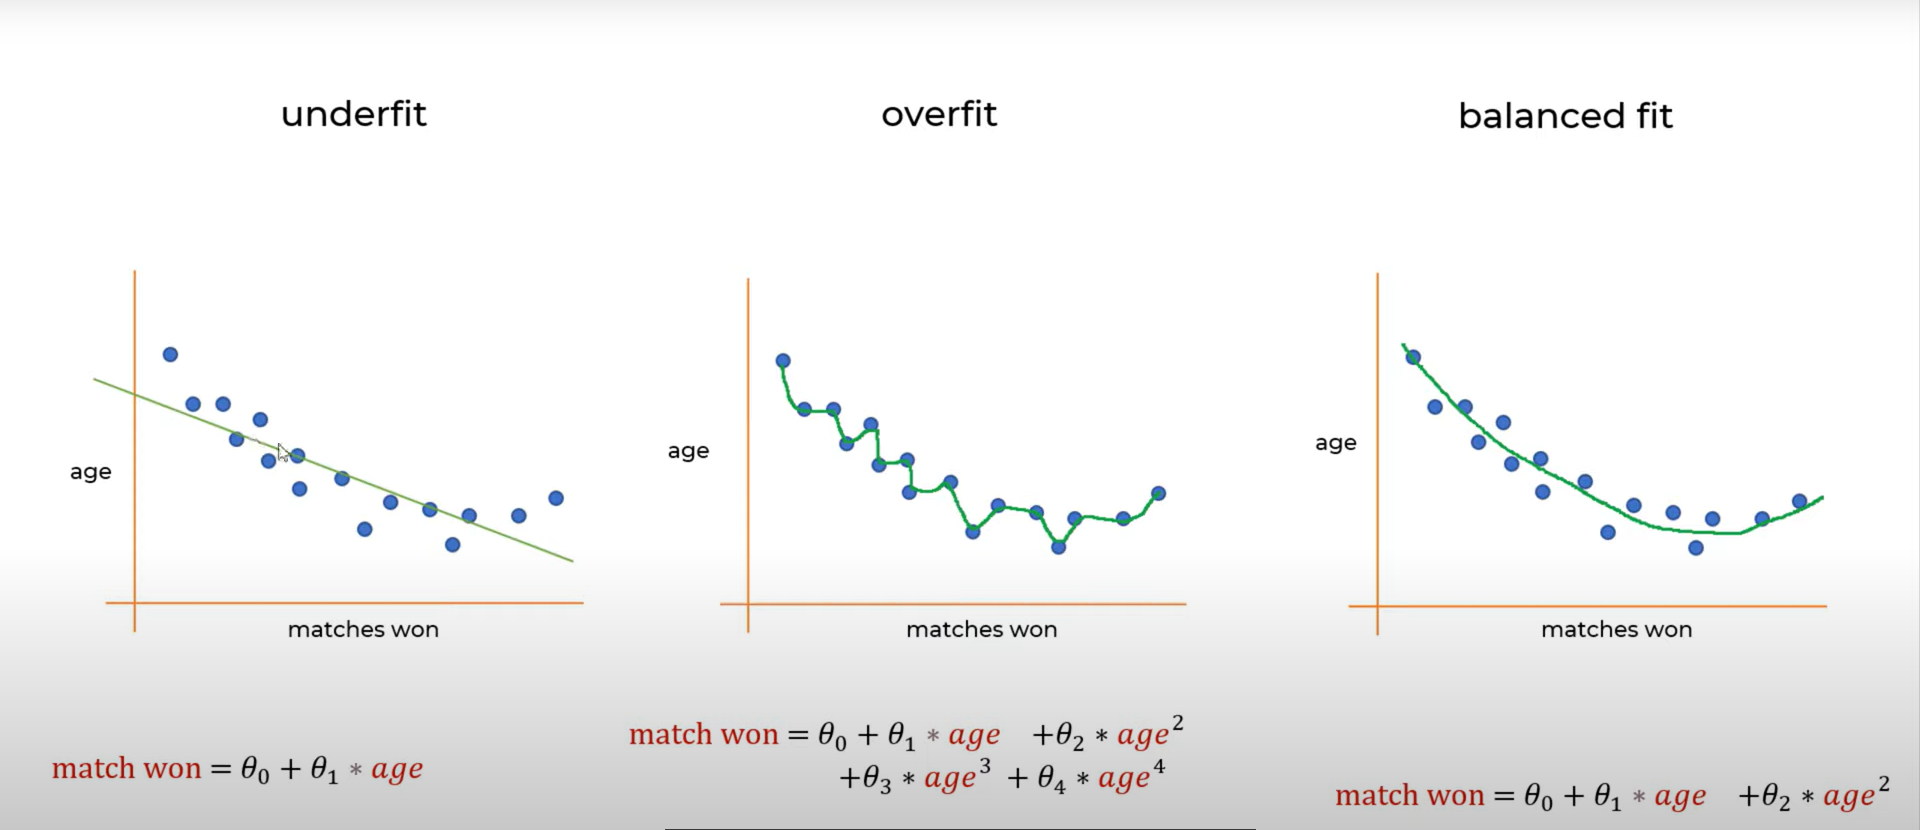

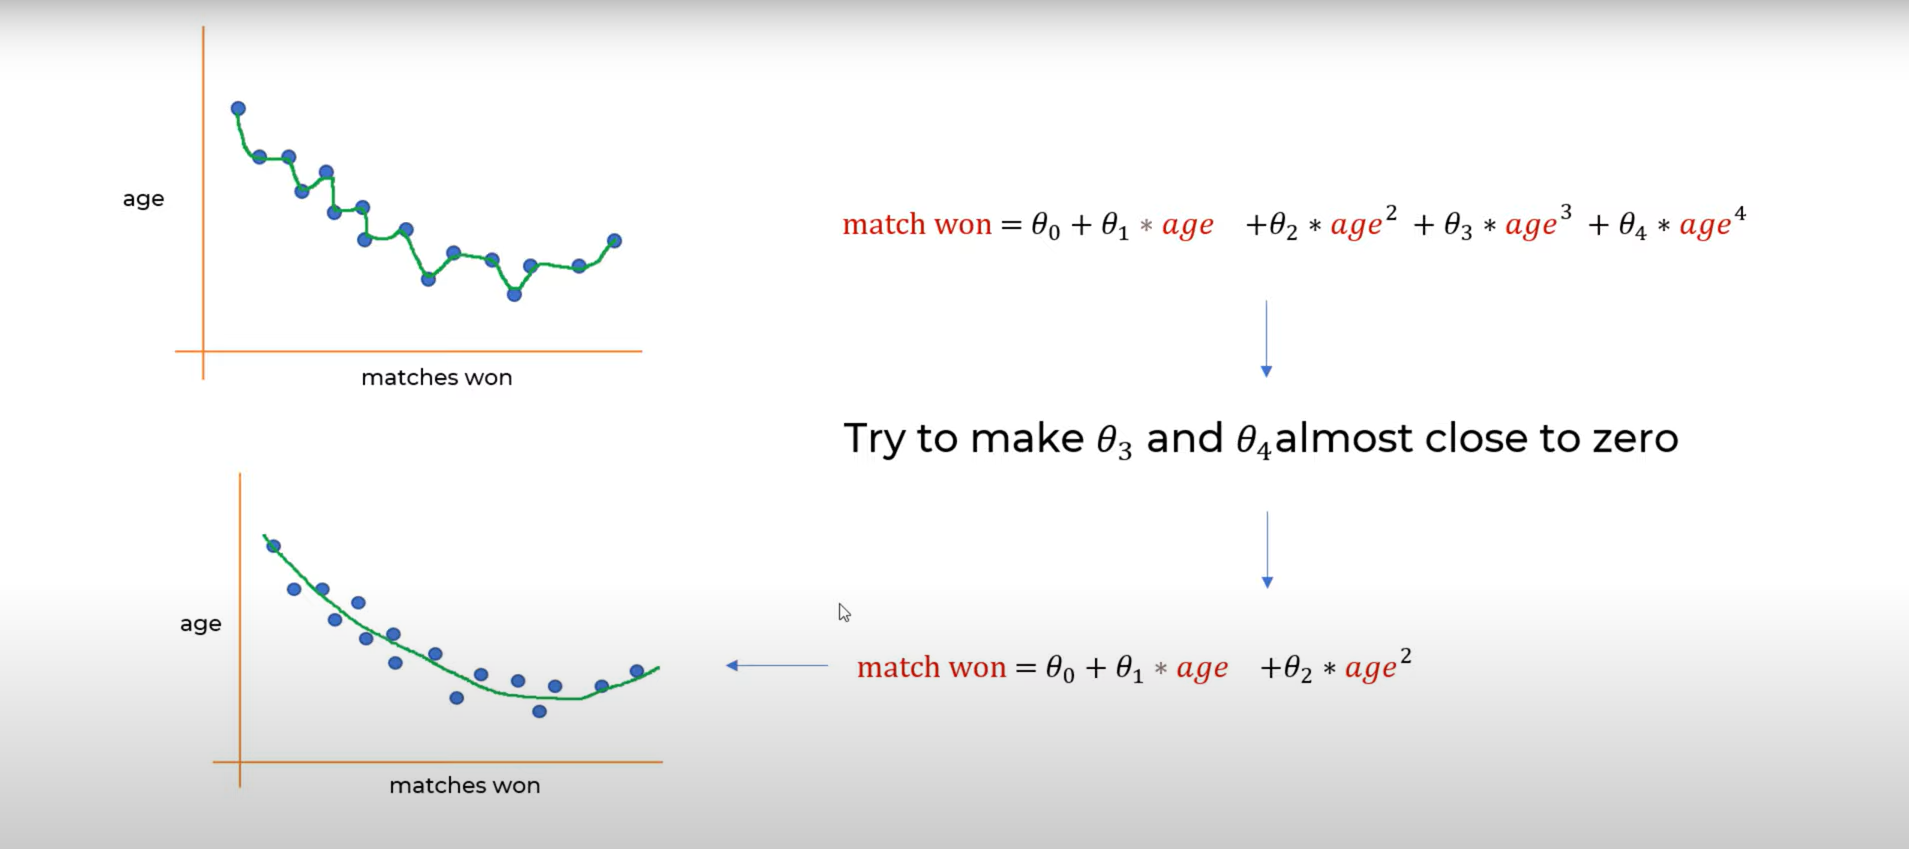

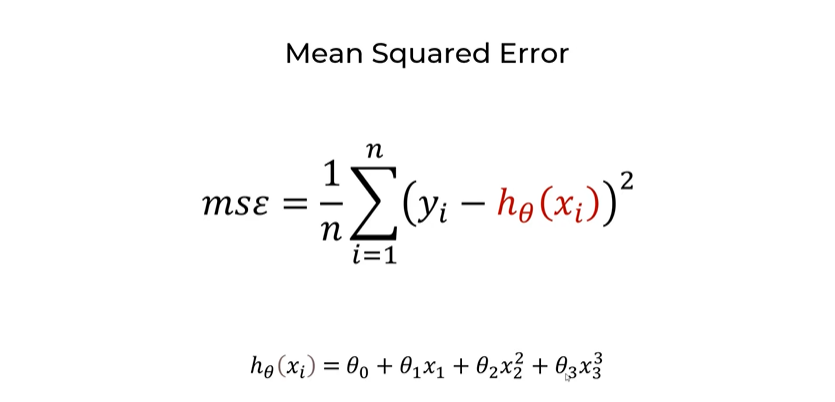

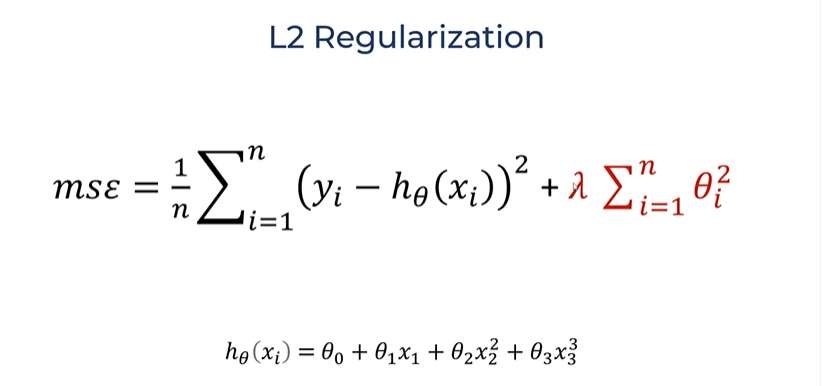

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read dataset
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
dataset.shape

(34857, 21)

### Checking for Nan values

In [6]:
dataset.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Handling Missing values

In [7]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [8]:
dataset.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        0
dtype: int64

#### Drop NA values of Price, since it's our predictive variable we won't impute it

In [9]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Let's one hot encode the categorical features

In [10]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,False,True,False,False,True,False,False,False,False,False
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,False,True,False,False,True,False,False,False,False,False
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,False,True,False,False,True,False,False,False,False,False
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,False,True,False,False,True,False,False,False,False,False
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,False,True,False,False,True,False,False,False,False,False


### Let's bifurcate our dataset into train and test dataset

In [11]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

### Let's train our Linear Regression Model on training dataset and check the accuracy on test set

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [18]:
reg.score(train_X,train_y)

1.0

In [17]:
reg.score(test_X,test_y)

0.6030650619984137

### Normal Regression is clearly overfitting the data, let's try other models

## Using Lasso (L1 Regularized) Regression Model

In [19]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X,train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [20]:
lasso_reg.score(test_X,test_y)

0.7250391871835302

In [21]:
lasso_reg.score(train_X,train_y)

0.8905041651229756